# <span style = "color:Green">**CSCI-461 Project** </span>
## This notebook would provide:
- ### <span style = "color:Blue">Data Exploration
- ### <span style = "color:Blue">Data Preperation
- ### <span style = "color:Blue">Model Training and Evaluation
## For Loan Prediction Data Set
### The dataset is downloaded from Data Hack website: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
### Madeby:
#### <span style="color:Maroon"> 1. Belal Elseraty </span>
#### <span style="color:Maroon"> 2. Fady Samir </span>
#### <span style="color:Maroon"> 3. Salah Elshiekh </span>
#### <span style="color:Maroon"> 4. Ahmed Ehab </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
loan = pd.read_csv("Train-File.csv")

In [9]:
loan[loan['ApplicantIncome']== 5849]["Education"]

0    Graduate
Name: Education, dtype: object

## <span style="color:Blue">1. Data Exploration </span>

In [3]:
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan.describe(include = 'all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001392,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [7]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

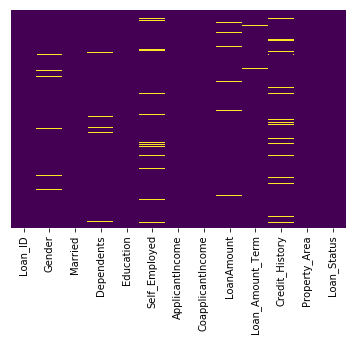

In [8]:
sns.heatmap(loan.isnull(), yticklabels=False, cbar = False, cmap ='viridis')

In [11]:
loan['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

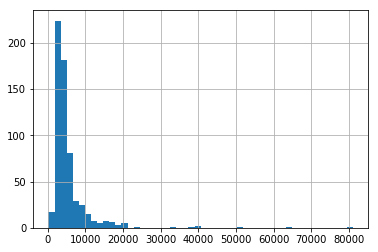

In [12]:
loan['ApplicantIncome'].hist(bins=50)

### As seen, the income of the applicants in the data set is left-skewed, not normally distributed

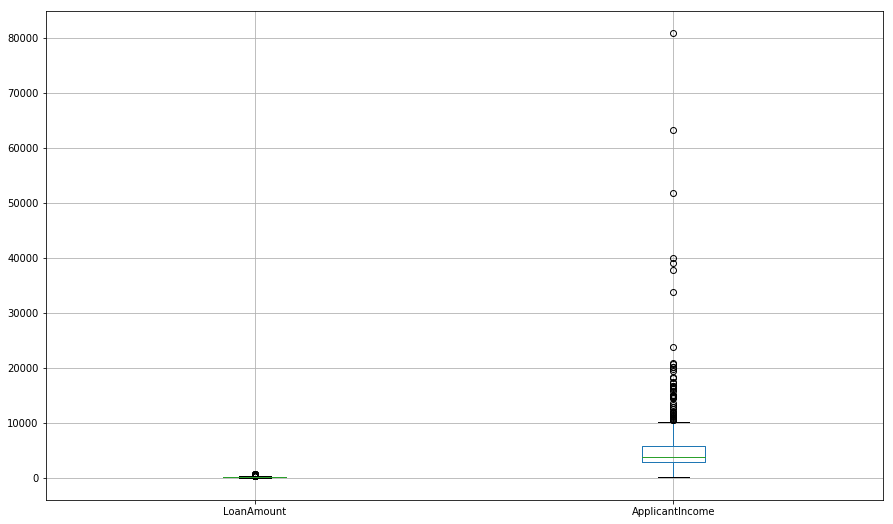

In [14]:
loan.boxplot(column=['LoanAmount', 'ApplicantIncome'], figsize=(15,9))

### As seen, the data varies alot in Applicant Income Feature, but no variance in Loan Amount

In [15]:
loan['LoanAmount'].std()

85.58732523570545

In [18]:
loan['ApplicantIncome'].std()

6109.041673387174

In [19]:
loan['LoanAmount'].max()-loan['LoanAmount'].min()

691.0

### As the loan amount data doesn't vary alot, we can fill the missing data just using the mean of the feature

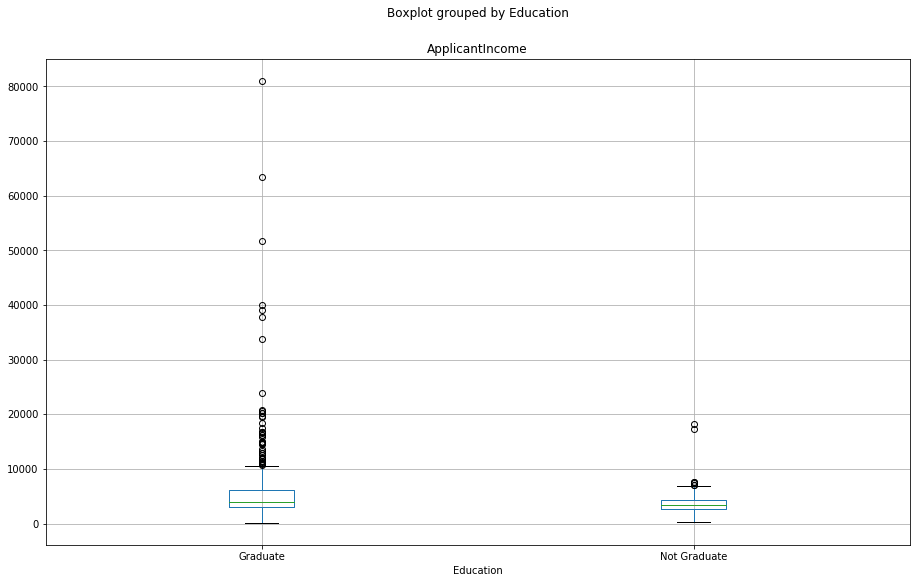

In [20]:
loan.boxplot(column='ApplicantIncome', by = 'Education', figsize=(15,9))

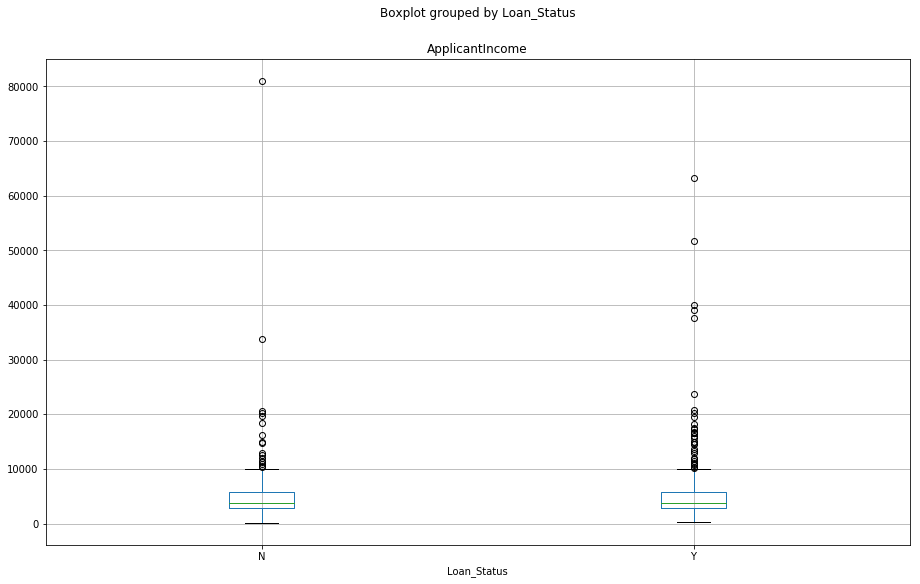

In [21]:
loan.boxplot(column='ApplicantIncome', by = 'Loan_Status', figsize=(15,9))

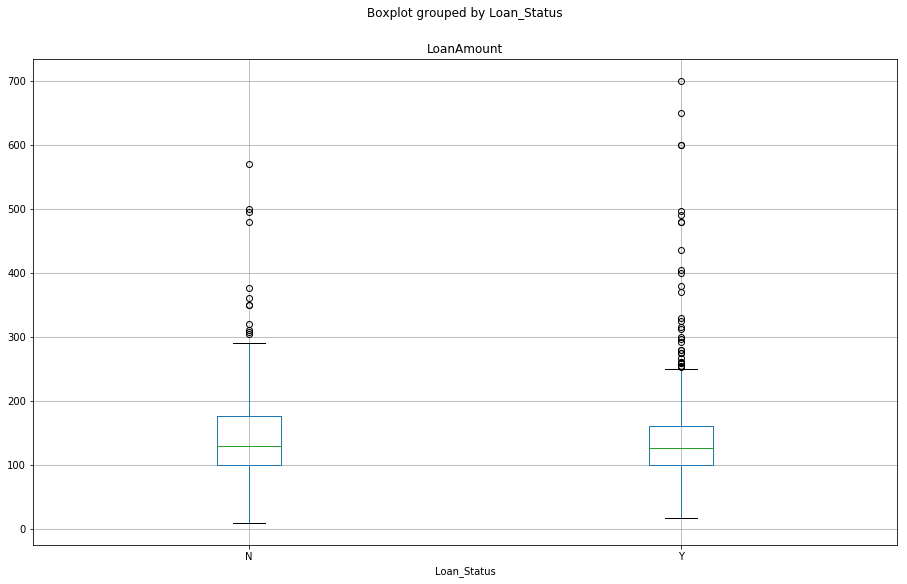

In [22]:
loan.boxplot(column='LoanAmount', by = 'Loan_Status', figsize=(15,9))

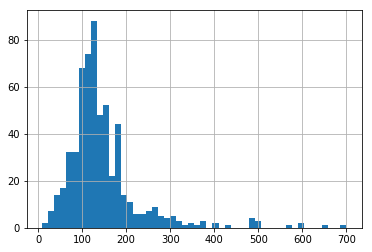

In [23]:
loan['LoanAmount'].hist(bins=50)

In [25]:
tmp1 = loan['Credit_History'].value_counts(ascending=True)
tmp2 = loan.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (tmp1)
print ('\nProbility of getting loan for each Credit History class:')
print (tmp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


### Please note that "Credit History" attribute, is how the customer's credit history meets the guidlines of the bank, a binary object

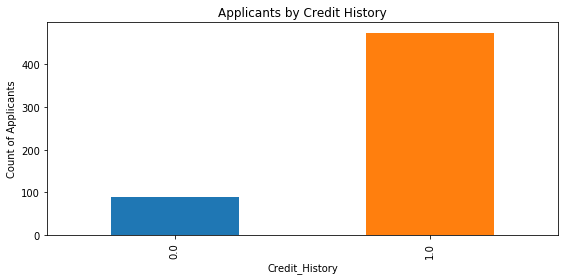

In [26]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit History")
tmp1.plot(kind='bar')
plt.tight_layout()

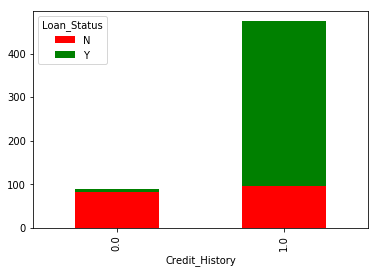

In [27]:
tmp3 = pd.crosstab(loan['Credit_History'], loan['Loan_Status'])
tmp3.plot(kind='bar', stacked=True, color=['red','green'], grid=False)

## <span style="color:Blue"> 2. Data Preperation </span>

### We would fill the missing data using Descriptive Statistics methods for continous non-variant features

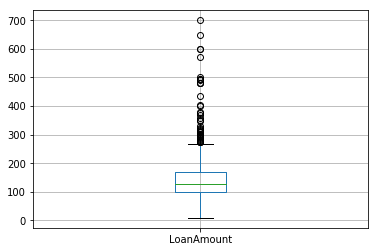

In [28]:
loan.boxplot('LoanAmount')

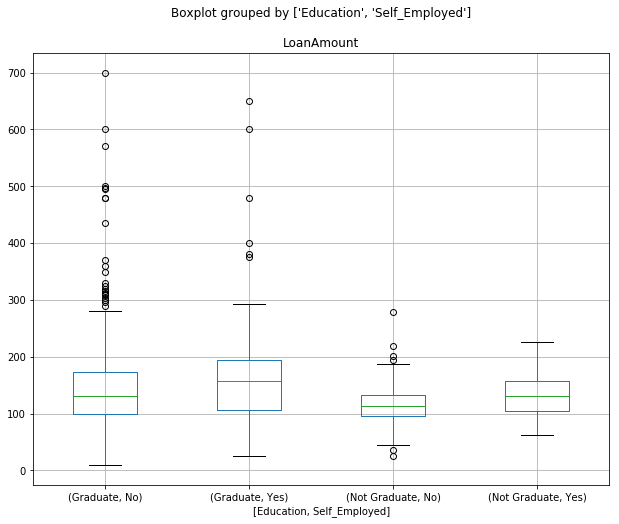

In [29]:
loan.boxplot(column='LoanAmount', by= ['Education', 'Self_Employed'],figsize=(10,8))

### Thus we see some variations in the median of loan amount for each group and this can be used to impute the values. But first, we have to ensure that each of Self_Employed and Education features should not have a missing values.

In [31]:
loan['Self_Employed'].fillna('No',inplace=True)

### Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount

In [32]:
table = loan.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

In [33]:
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

In [34]:
loan['LoanAmount'].fillna(loan[loan['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

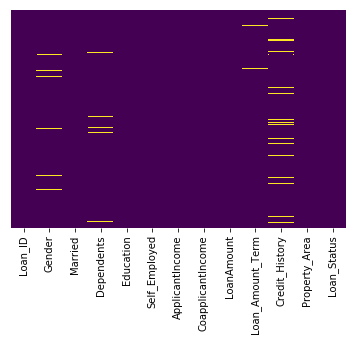

In [35]:
sns.heatmap(loan.isnull(), yticklabels=False, cbar = False, cmap ='viridis')

In [36]:
print("The precentage of missing values in Gender feature is :", loan['Gender'].isnull().sum()/len(loan['Gender']) * 100, "%","\nThe precentage of missing values in Dependants feature is :", loan['Dependents'].isnull().sum()/len(loan['Dependents']) * 100, "%","\nThe precentage of missing values in Loan Amount Term feature is :", loan['Loan_Amount_Term'].isnull().sum()/len(loan['Loan_Amount_Term']) * 100, "%")

The precentage of missing values in Gender feature is : 2.1172638436482085 % 
The precentage of missing values in Dependants feature is : 2.44299674267101 % 
The precentage of missing values in Loan Amount Term feature is : 2.2801302931596092 %


### As the missing data prencetile is too low, we can fill them with the mode of each attribuite

In [37]:
genderMode = loan['Gender'].mode()
dependantsMode = loan['Dependents'].mode()
termMode = loan['Loan_Amount_Term'].mode()

In [38]:
loan['Gender'].fillna(genderMode[0], inplace = True)
loan['Dependents'].fillna(dependantsMode[0], inplace = True)
loan['Loan_Amount_Term'].fillna(termMode[0], inplace = True)

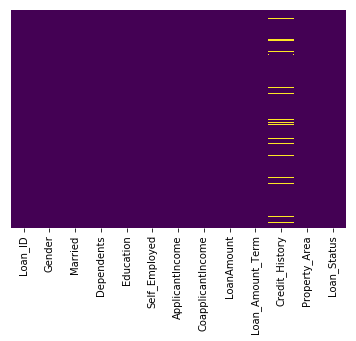

In [39]:
sns.heatmap(loan.isnull(), yticklabels=False, cbar = False, cmap ='viridis')

In [41]:
print("The precentage of missing values in Credit History feature is :", loan['Credit_History'].isnull().sum()/len(loan['Credit_History']) * 100, "%")

The precentage of missing values in Credit History feature is : 8.143322475570033 %


### As the missing values precentile exceeds 3% of the feature size, we can't use mode to fill this data. And as the credit history is a huge factor in Loan_Status, we shall drop the null values

In [42]:
loan.dropna(inplace=True)

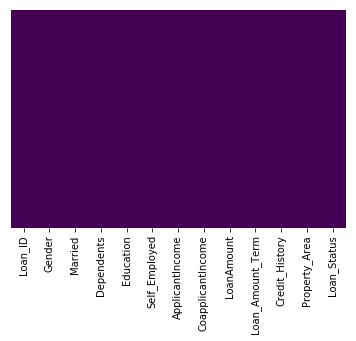

In [43]:
sns.heatmap(loan.isnull(), yticklabels=False, cbar = False, cmap ='viridis')

### Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

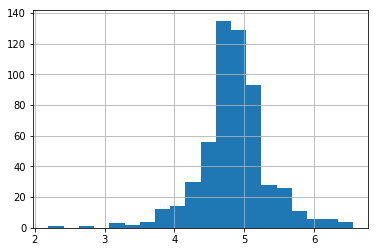

In [44]:
loan['LoanAmount_log'] = np.log(loan['LoanAmount'])
loan['LoanAmount_log'].hist(bins=20)

### Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

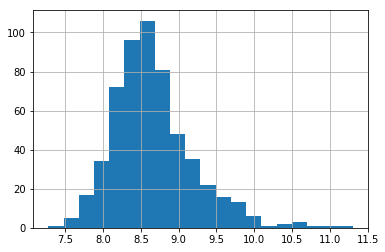

In [45]:
loan['TotalIncome'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']
loan['TotalIncome_log'] = np.log(loan['TotalIncome'])
loan['TotalIncome_log'].hist(bins=20) 

## <span style="color:Blue"> 3. Model Training and Evaluation </span>

In [47]:
variables = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in variables:
    loan[i] = le.fit_transform(loan[i])
loan.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [48]:
x = loan.drop('Loan_Status', axis= 1)
y = loan['Loan_Status']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [50]:
logModel = LogisticRegression()

In [51]:
x_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log',
       'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [52]:
x_test.drop('Loan_ID', axis = 1, inplace = True)
x_train.drop('Loan_ID', axis = 1, inplace = True)

/home/blazkowicz69/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [53]:
logModel.fit(x_train, y_train)

/home/blazkowicz69/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
386,1,0,0,1,0,2346,1600.0,132.0,360.0,1.0,1,4.882802,3946.0,8.280458
361,1,1,2,0,0,5000,3667.0,236.0,360.0,1.0,1,5.463832,8667.0,9.067278
128,1,1,1,0,1,10513,3850.0,160.0,180.0,0.0,2,5.075174,14363.0,9.572411
354,0,1,0,0,0,2423,505.0,130.0,360.0,1.0,1,4.867534,2928.0,7.982075
141,1,0,0,0,0,5417,0.0,168.0,360.0,1.0,2,5.123964,5417.0,8.597297


In [56]:
y_pred = logModel.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logModel.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [57]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 26  21]
 [  1 121]]


### As noticed, the model has an accuracy of 87%, and the confusion matrix is showed above